# **Bar Charts**


## Objectives


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 185.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 186.7 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 187.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 176.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 172.7 MB/s eta 0:00:00


In [3]:
# Step 1: Download the dataset
# !wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
#
# This code imports the necessary libraries for working with SQLite databases, data manipulation, and plotting:
#
# sqlite3: This library allows you to interact with SQLite databases,
#          enabling you to connect, execute SQL queries, and retrieve data.
# pandas: This library provides data structures and functions for data manipulation and analysis, 
#         particularly with DataFrames, which are essential for working with tabular data.
#
# matplotlib.pyplot: This library is used for creating visualizations, 
#                    such as plots and charts, to explore and present data.
 
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# 
# Connect to the SQLite database
#

In [6]:
conn = sqlite3.connect('survey-data.sqlite')

In [7]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


In [8]:
df

,COUNT(*)
0,65437


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [10]:
df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Age'])
df_filtered['Age']

0        Under 18 years old
1           35-44 years old
2           45-54 years old
3           18-24 years old
4           18-24 years old
                ...        
65432       18-24 years old
65433       25-34 years old
65434       25-34 years old
65435       18-24 years old
65436       18-24 years old
Name: Age, Length: 65437, dtype: object

In [11]:
# Convert age to numerical values
age_mapping = {
    'Under 18 years old': 17,  # Approximate age
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65  # Approximate age
}

df_filtered['Age_Numeric'] = df_filtered['Age'].map(age_mapping)
df_filtered['Age_Numeric']

0        17.0
1        40.0
2        50.0
3        21.0
4        21.0
         ... 
65432    21.0
65433    30.0
65434    30.0
65435    21.0
65436    21.0
Name: Age_Numeric, Length: 65437, dtype: float64

In [12]:
# Assuming df_filtered is your DataFrame

num_unique_ages = df_filtered['Age_Numeric'].nunique()

print(f"Number of distinct ages: {num_unique_ages}")

Number of distinct ages: 7


In [13]:
# 2. Box Plot of Age
# Since Age is categorical in the dataset, convert it to numerical values for a box plot.
#
# 2. 年齡箱線圖 
# 由於年齡在資料集中屬於分類，因此請將其轉換為箱線圖的數值。
#

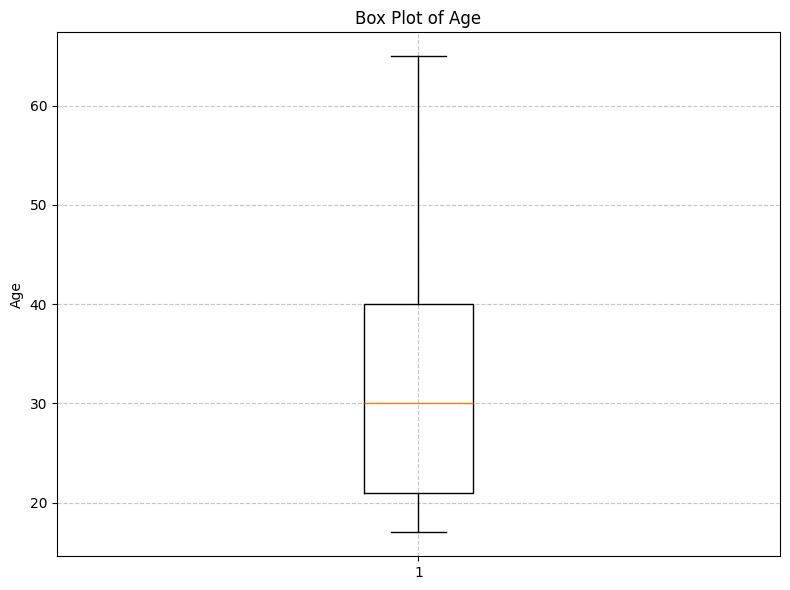

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Age'])

# Convert age to numerical values
age_mapping = {
    'Under 18 years old': 17,  # Approximate age
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65  # Approximate age
}

df_filtered['Age_Numeric'] = df_filtered['Age'].map(age_mapping)

# Create box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_filtered['Age_Numeric'].dropna(), vert=True)

plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
# Task 2: Visualizing Relationships in Data
# 1. Scatter Plot of Age_numeric and ConvertedCompYearly
# Explore the relationship between age and compensation.
#

# 任務 2：可視化資料中的關係 
# 1. Age_numeric 和 ConvertedCompYearly 的散佈圖 
# 探討年齡與薪酬之間的關係。
#

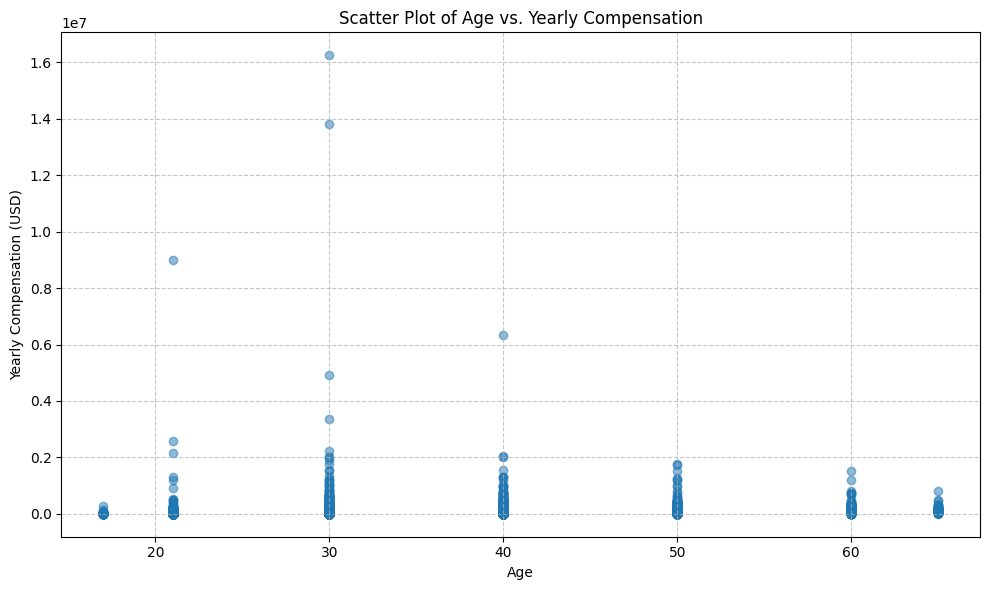

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Age', 'ConvertedCompYearly']).copy()

# Convert age to numerical values
age_mapping = {
    'Under 18 years old': 17,  # Approximate age
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65  # Approximate age
}

df_filtered['Age_Numeric'] = df_filtered['Age'].map(age_mapping)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Age_Numeric'], df_filtered['ConvertedCompYearly'], alpha=0.5)

plt.title('Scatter Plot of Age vs. Yearly Compensation')
plt.xlabel('Age')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
# 2. Bubble Plot of ConvertedCompYearly and JobSatPoints_6 with Age_numeric as Bubble Size
# Explore how compensation and job satisfaction are related, with age as the bubble size.
#
# 2. ConvertedCompYearly 和 JobSatPoints_6 的氣泡圖，以 Age_numeric 為氣泡大小 
# 探討薪酬與工作滿意度之間的關係，以年齡為氣泡大小。
#

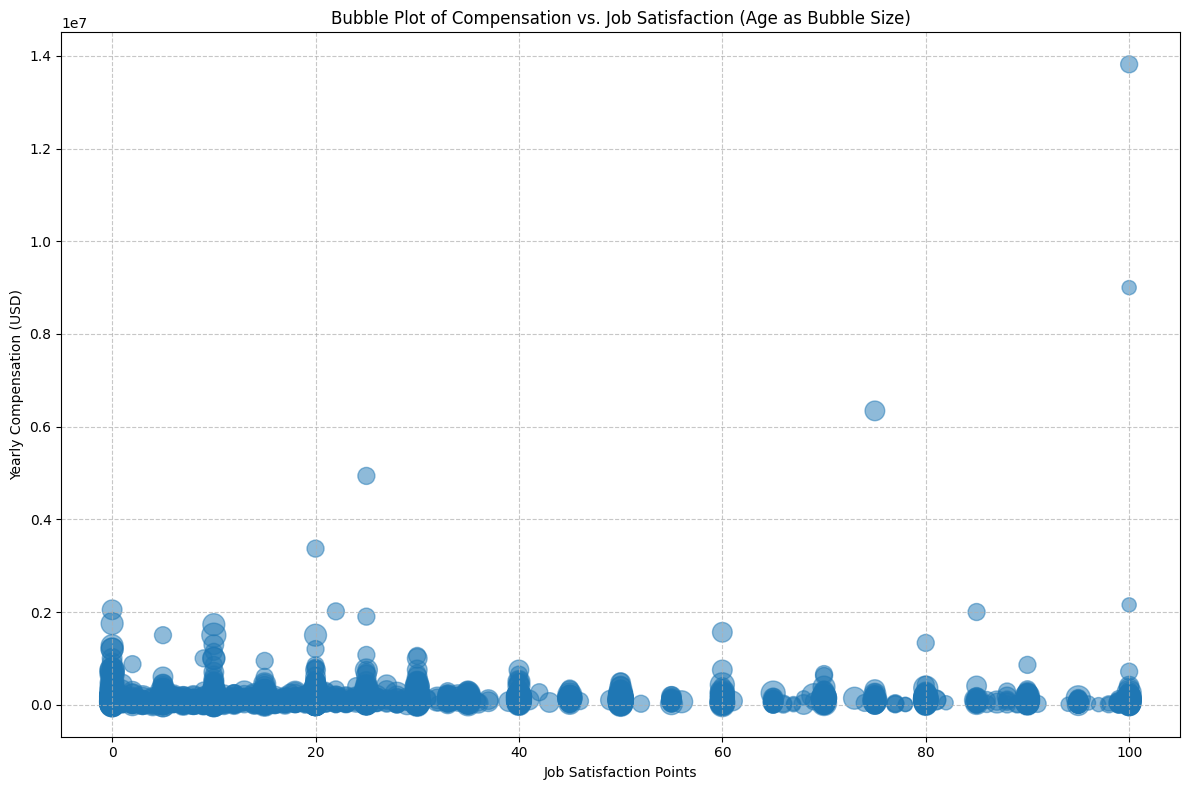

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age']).copy()

# Convert age to numerical values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65
}
df_filtered['Age_Numeric'] = df_filtered['Age'].map(age_mapping)

# Create bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['JobSatPoints_6'], df_filtered['ConvertedCompYearly'],
            s=df_filtered['Age_Numeric'] * 5,  # Adjust multiplier for bubble size
            alpha=0.5)

plt.title('Bubble Plot of Compensation vs. Job Satisfaction (Age as Bubble Size)')
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
# Task 3: Visualizing Composition of Data with Bar Charts
# 1. Horizontal Bar Chart of MainBranch Distribution
# Visualize the distribution of respondents’ primary roles to understand their professional focus
#
# 任務 3：使用長條圖視覺化資料組成 
# 1. MainBranch 分佈水平長條圖 
# 直觀地了解受訪者主要角色的分佈，以了解他們的專業重點。
#

In [20]:
df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['MainBranch'])
df_filtered.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [21]:
# Count occurrences of each role
role_counts = df_filtered['MainBranch'].value_counts()
role_counts.info

<bound method Series.info of MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64>

In [22]:
role_counts

MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64

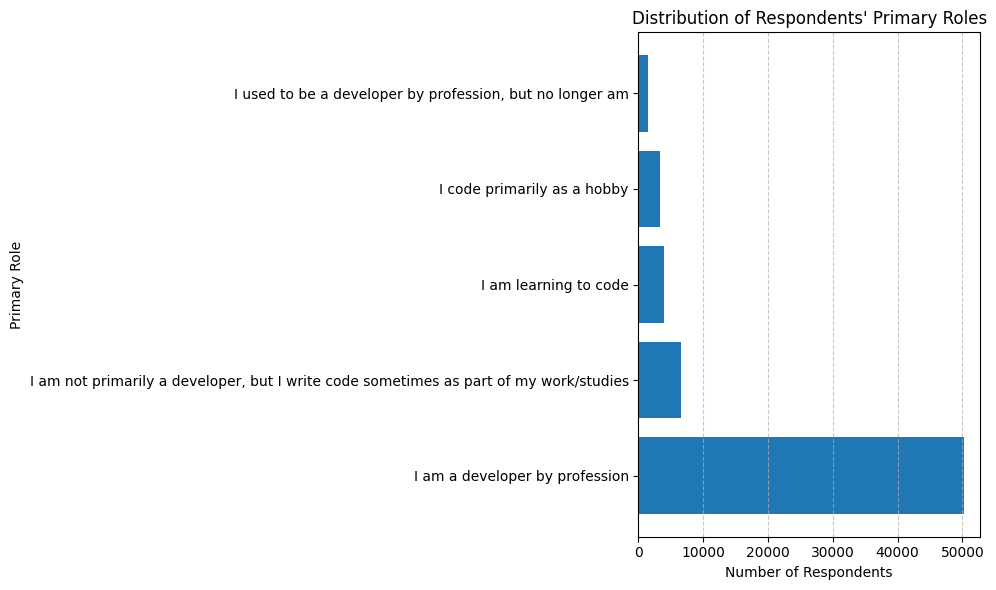

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['MainBranch'])

# Count occurrences of each role
role_counts = df_filtered['MainBranch'].value_counts()

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(role_counts.index, role_counts.values)

plt.title('Distribution of Respondents\' Primary Roles')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
# 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With
# Identify the most desired programming languages based on LanguageWantToWorkWith.
#
# 2. 受訪者最想使用的 5 大程式語言垂直長條圖 
# 根據 LanguageWantToWorkWith 來決定最想要的程式語言。
#

In [25]:
df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['LanguageWantToWorkWith'])

df_filtered

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65421,65422,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65427,65428,"I am not primarily a developer, but I write co...",25-34 years old,"Not employed, but looking for work;Employed, p...",In-person,Apples,Hobby;Professional development or self-paced l...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65431,65432,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [26]:
# Split languages and create a new DataFrame
languages = df_filtered['LanguageWantToWorkWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('Language')
languages.info

<bound method Series.info of 1        Bash/Shell (all shells)
1                             Go
1                       HTML/CSS
1                           Java
1                     JavaScript
                  ...           
65435                       Rust
65435                        SQL
65436                 JavaScript
65436                     Python
65436                 TypeScript
Name: Language, Length: 266539, dtype: object>

In [27]:
# Assuming df_filtered, num_unique_Language is your DataFrame

num_unique_Languages = df_filtered['LanguageWantToWorkWith'].nunique()

num_unique_Languages

22769

In [29]:
# Count the occurrences of each language
language_counts = languages.value_counts()
language_counts.head()

Language
Python        25047
JavaScript    23774
SQL           22400
HTML/CSS      20721
TypeScript    20239
Name: count, dtype: int64

In [30]:
# Get the top 5 languages
top_5_languages = language_counts.head(5)
top_5_languages.head()

Language
Python        25047
JavaScript    23774
SQL           22400
HTML/CSS      20721
TypeScript    20239
Name: count, dtype: int64

In [31]:
# 
# Connect to the SQLite database
#

# conn = sqlite3.connect('survey-data.sqlite')

In [32]:
QUERY = """
SELECT LanguageWantToWorkWith, COUNT(*) as count 
FROM main 
GROUP BY LanguageWantToWorkWith
ORDER BY LanguageWantToWorkWith
"""
df_LanguageWantToWorkWith = pd.read_sql_query(QUERY, conn)
print(df_LanguageWantToWorkWith)
df_LanguageWantToWorkWith.head()

                          LanguageWantToWorkWith  count
0                                           None   9685
1                                            Ada     54
2                                       Ada;Apex      4
3                              Ada;Apex;Assembly      2
4      Ada;Apex;Assembly;Bash/Shell (all shells)      1
...                                          ...    ...
22765                                        VBA     14
22766                    VBA;Visual Basic (.Net)      1
22767                        Visual Basic (.Net)     11
22768                                     Zephyr      2
22769                                        Zig     52

[22770 rows x 2 columns]


,LanguageWantToWorkWith,count
0,None,9685
1,Ada,54
2,Ada;Apex,4
3,Ada;Apex;Assembly,2
4,Ada;Apex;Assembly;Bash/Shell (all shells),1


In [33]:
QUERY = """
SELECT distinct LanguageWantToWorkWith
FROM main 
ORDER BY LanguageWantToWorkWith
"""
df_LanguageWantToWorkWith = pd.read_sql_query(QUERY, conn)
print(df_LanguageWantToWorkWith)
df_LanguageWantToWorkWith.head()

                          LanguageWantToWorkWith
0                                           None
1                                            Ada
2                                       Ada;Apex
3                              Ada;Apex;Assembly
4      Ada;Apex;Assembly;Bash/Shell (all shells)
...                                          ...
22765                                        VBA
22766                    VBA;Visual Basic (.Net)
22767                        Visual Basic (.Net)
22768                                     Zephyr
22769                                        Zig

[22770 rows x 1 columns]


,LanguageWantToWorkWith
0,None
1,Ada
2,Ada;Apex
3,Ada;Apex;Assembly
4,Ada;Apex;Assembly;Bash/Shell (all shells)


In [37]:
QUERY = """
SELECT LanguageWantToWorkWith, count(*) 
FROM main 
WHERE NOT LanguageWantToWorkWith = 'None'
GROUP BY LanguageWantToWorkWith
order by 2 desc
"""
df_LanguageWantToWorkWith = pd.read_sql_query(QUERY, conn)
print(df_LanguageWantToWorkWith)
df_LanguageWantToWorkWith.head()

                                  LanguageWantToWorkWith  count(*)
0                                                 Python       922
1                                                   Rust       737
2                         HTML/CSS;JavaScript;TypeScript       632
3                                                     C#       538
4                                                     Go       460
...                                                  ...       ...
22764  Ada;Apex;Assembly;Bash/Shell (all shells);C#;C...         1
22765  Ada;Apex;Assembly;Bash/Shell (all shells);C#;C...         1
22766  Ada;Apex;Assembly;Bash/Shell (all shells);C#;C...         1
22767       Ada;Apex;Assembly;Bash/Shell (all shells);C#         1
22768          Ada;Apex;Assembly;Bash/Shell (all shells)         1

[22769 rows x 2 columns]


,LanguageWantToWorkWith,count(*)
0,Python,922
1,Rust,737
2,HTML/CSS;JavaScript;TypeScript,632
3,C#,538
4,Go,460


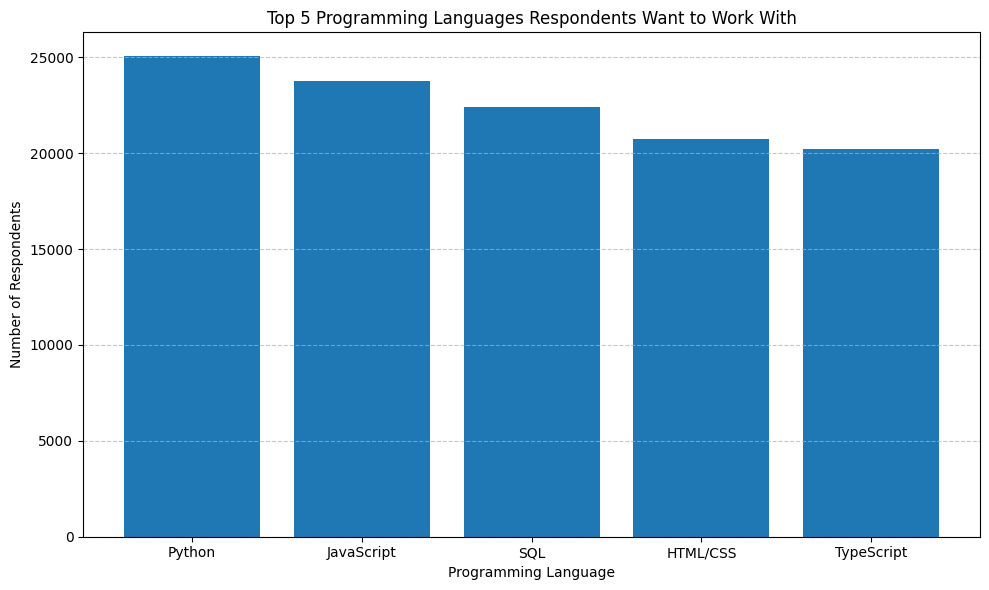

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['LanguageWantToWorkWith'])

# Split languages and create a new DataFrame
languages = df_filtered['LanguageWantToWorkWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('Language')

# Count the occurrences of each language
language_counts = languages.value_counts()

# Get the top 5 languages
top_5_languages = language_counts.head(5)

# Create vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_languages.index, top_5_languages.values)

plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 3. Stacked Bar Chart of Median JobSatPoints_6 and JobSatPoints_7 by Age Group
# Compare job satisfaction metrics across different age groups with a stacked bar chart.
#
# 3. 按年齡組別分割的 JobSatPoints_6 和 JobSatPoints_7 中位數的堆疊長條圖 
# 使用堆積長條圖比較不同年齡層的工作滿意度指標。
#

<Figure size 1200x600 with 0 Axes>

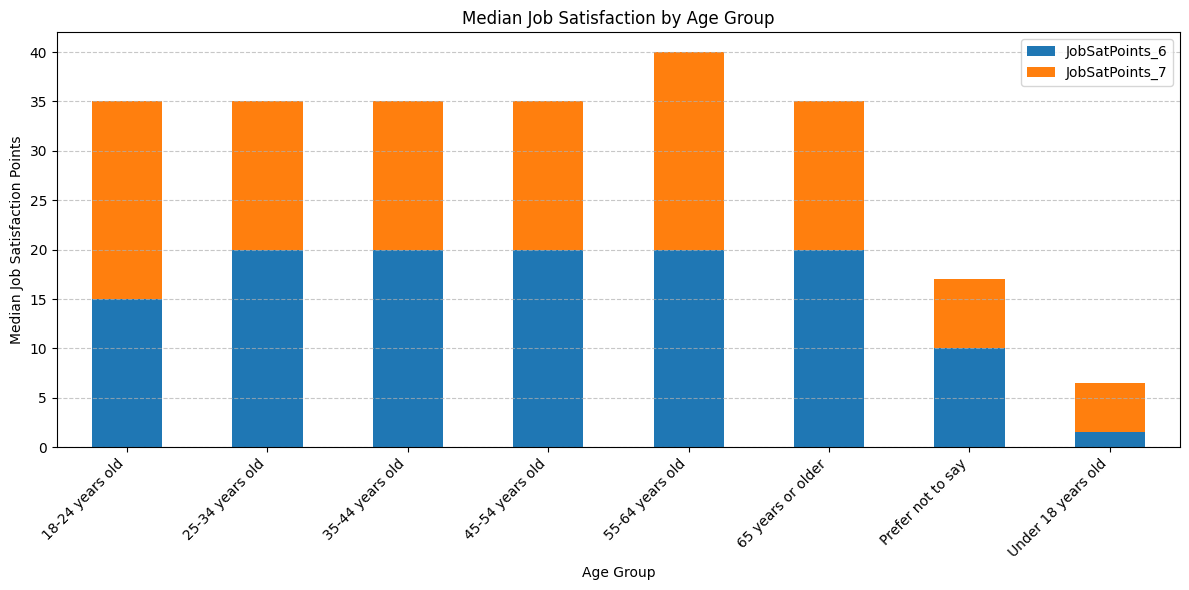

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Calculate median job satisfaction by age group
median_job_sat_by_age = df_filtered.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Create stacked bar chart
plt.figure(figsize=(12, 6))
median_job_sat_by_age.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Median Job Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Bar Chart of Database Popularity (DatabaseHaveWorkedWith)
# Identify the most commonly used databases among respondents by visualizing DatabaseHaveWorkedWith.
#
# 4. 資料庫流行度長條圖（DatabaseHaveWorkedWith） 
# 透過視覺化 DatabaseHaveWorkedWith 來確定受訪者最常用的資料庫。
#

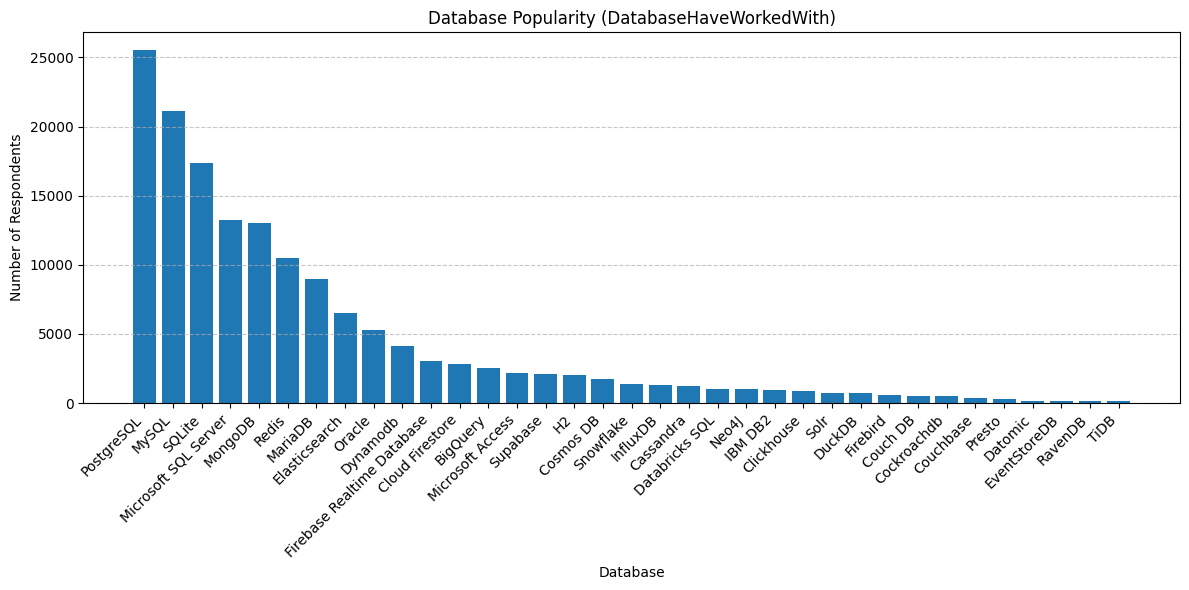

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['DatabaseHaveWorkedWith'])

# Split databases and create a new DataFrame
databases = df_filtered['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('Database')

# Count the occurrences of each database
database_counts = databases.value_counts()

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(database_counts.index, database_counts.values)

plt.title('Database Popularity (DatabaseHaveWorkedWith)')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
# Task 4: Visualizing Comparison of Data with Bar Charts
# 1. Grouped Bar Chart of Median ConvertedCompYearly for Different Age Groups
# Compare median compensation across multiple age groups with a grouped bar chart.
#
# 任務 4：使用長條圖視覺化資料比較 
# 1. 不同年齡組 ConvertedCompYearly 中位數的分組長條圖
#使用分組長條圖比較多個年齡組的平均薪酬。
#

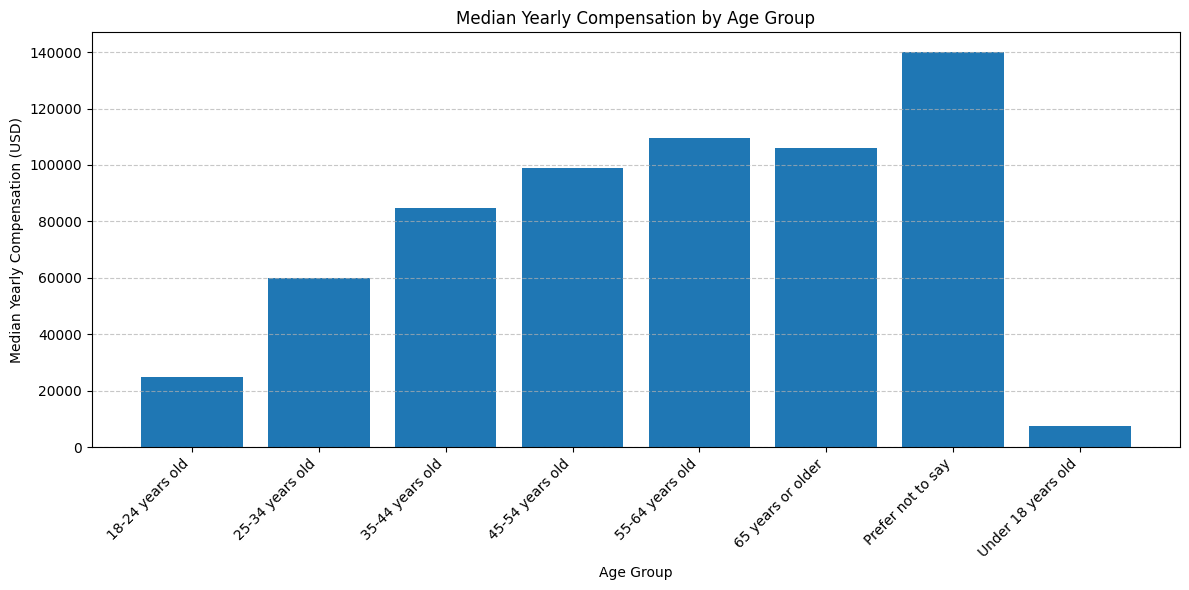

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Calculate median compensation by age group
median_comp_by_age = df_filtered.groupby('Age')['ConvertedCompYearly'].median()

# Create grouped bar chart
plt.figure(figsize=(12, 6))

age_groups = median_comp_by_age.index
median_values = median_comp_by_age.values
bar_width = 0.8  # Adjust bar width as needed

plt.bar(age_groups, median_values, width=bar_width)

plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Bar Chart of Respondent Count by Country
# Show the distribution of respondents by country to see which regions are most represented.
#
# 2. 受訪者人數（依國家/地區）長條圖 
#顯示受訪者依國家分佈的情況，以了解哪些地區的受訪者最多。
#

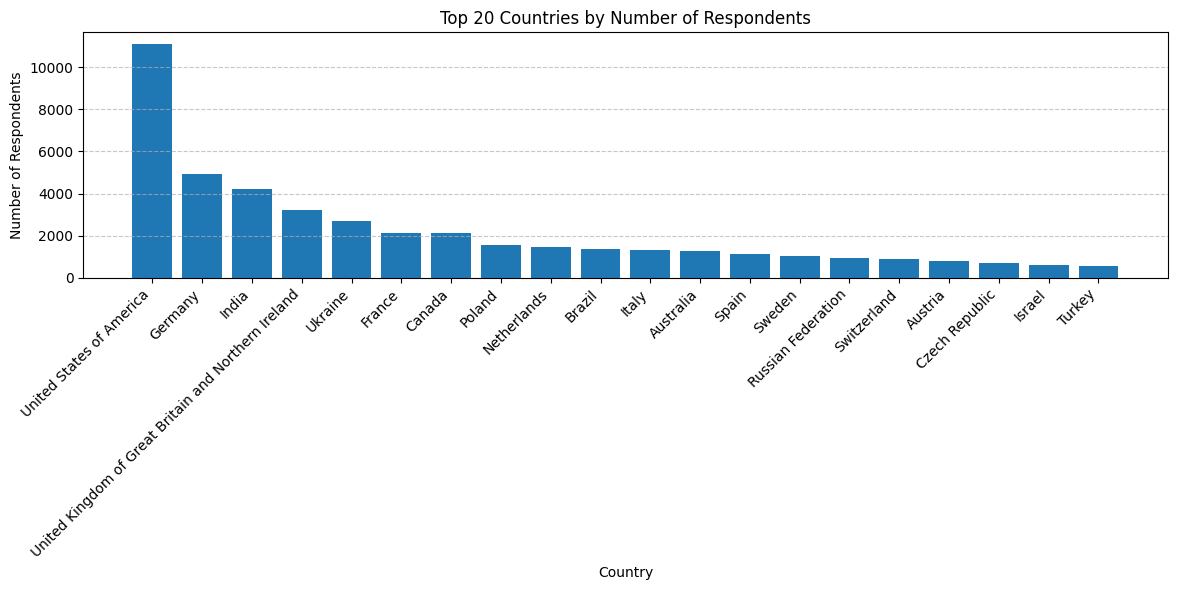

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Country'])

# Count the occurrences of each country
country_counts = df_filtered['Country'].value_counts()

# Get the top N countries (e.g., top 20)
top_n = 20  # You can adjust this number
top_countries = country_counts.head(top_n)

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_countries.index, top_countries.values)

plt.title(f'Top {top_n} Countries by Number of Respondents')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 概括
# 完成本實驗後，您將能夠：
#
# 建立水平長條圖以直觀顯示受訪者主要角色的分佈，幫助了解他們的職業重點。
# 製作一個垂直長條圖，根據 LanguageWantToWorkWith 變數來辨識最需要的程式語言。
# 使用堆積長條圖比較不同年齡層的工作滿意度指標。
# 建立長條圖，使用 DatabaseHaveWorkedWith 變數直觀顯示受訪者最常使用的資料庫。